In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

**EDA**

In [3]:
train

,Date,Open,High,Low,Volume,Close
0,14-08-2015,57.484790,58.398406,57.342469,171718000,58.237720
1,17-08-2015,58.274453,59.013611,58.026536,163538800,58.788651
2,18-08-2015,58.453501,58.917197,58.260678,138242800,58.485638
3,19-08-2015,58.301997,58.494820,57.650069,193146000,57.801575
4,20-08-2015,57.374601,57.498558,56.249794,274006400,56.718082
...,...,...,...,...,...,...
1495,23-07-2021,299.658540,301.995035,298.400415,71447400,301.675507
1496,26-07-2021,301.096392,304.211720,299.958083,72434100,302.534241
1497,27-07-2021,302.793811,302.973565,295.664509,104818600,298.100861
1498,28-07-2021,294.186727,298.500271,289.653510,118931200,294.526215


In [4]:
train.head()

,Date,Open,High,Low,Volume,Close
0,14-08-2015,57.484790,58.398406,57.342469,171718000,58.237720
1,17-08-2015,58.274453,59.013611,58.026536,163538800,58.788651
2,18-08-2015,58.453501,58.917197,58.260678,138242800,58.485638
3,19-08-2015,58.301997,58.494820,57.650069,193146000,57.801575
4,20-08-2015,57.374601,57.498558,56.249794,274006400,56.718082


In [5]:
train.tail()

,Date,Open,High,Low,Volume,Close
1495,23-07-2021,299.658540,301.995035,298.400415,71447400,301.675507
1496,26-07-2021,301.096392,304.211720,299.958083,72434100,302.534241
1497,27-07-2021,302.793811,302.973565,295.664509,104818600,298.100861
1498,28-07-2021,294.186727,298.500271,289.653510,118931200,294.526215
1499,29-07-2021,293.947087,297.661523,293.727415,56699500,295.844238


In [6]:
train.shape

(1500, 6)

In [7]:
train.describe()

,Open,High,Low,Volume,Close
count,1500.000000,1500.000000,1500.000000,1.500000e+03,1500.000000
mean,117.962567,119.188406,116.766942,1.344507e+08,118.034245
std,69.605960,70.483358,68.640370,6.474265e+07,69.597154
min,46.975433,47.754310,46.728239,4.544800e+07,47.133999
25%,67.216725,67.603262,67.013241,9.138162e+07,67.464885
50%,91.015663,92.208971,90.564149,1.160496e+08,90.918922
75%,142.914154,144.374118,141.944432,1.581502e+08,143.038712
max,303.033493,304.551208,299.958083,6.488252e+08,302.853729


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1500 non-null   object 
 1   Open    1500 non-null   float64
 2   High    1500 non-null   float64
 3   Low     1500 non-null   float64
 4   Volume  1500 non-null   int64  
 5   Close   1500 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 70.4+ KB


In [9]:
# Convert all dates to datetime
from datetime import *

for i in train['Date']:
    i = datetime.strptime(i, '%d-%m-%Y')

**Augmented Dickey Fuller Test**

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
def adfTest(dataframe, column_name):
    result = adfuller(dataframe[column_name])
    print(i)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[0] < result[4]["5%"]:
        print ("Reject Ho - Time Series is Stationary")
    else:
        print ("Failed to Reject Ho - Time Series is Non-Stationary")
    print('\n')

In [12]:
for i in train.columns[1:]:
    adfTest(train, i)

Open
ADF Statistic: 1.453045
p-value: 0.997342
Failed to Reject Ho - Time Series is Non-Stationary


High
ADF Statistic: 1.314752
p-value: 0.996690
Failed to Reject Ho - Time Series is Non-Stationary


Low
ADF Statistic: 1.258677
p-value: 0.996367
Failed to Reject Ho - Time Series is Non-Stationary


Volume
ADF Statistic: -7.391433
p-value: 0.000000
Reject Ho - Time Series is Stationary


Close
ADF Statistic: 1.344565
p-value: 0.996847
Failed to Reject Ho - Time Series is Non-Stationary




As we can see, except volume, all columns are non stationary

Open


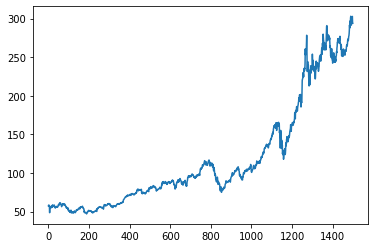

High


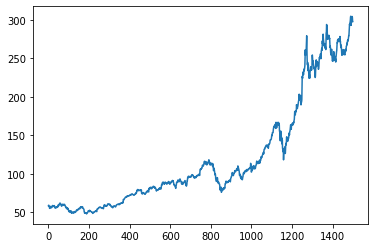

Low


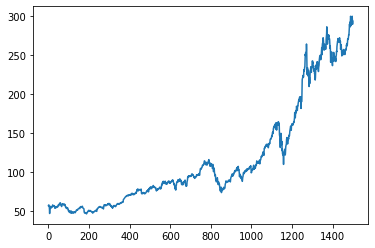

Volume


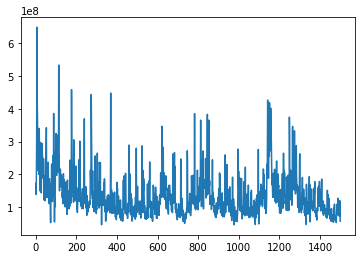

In [13]:
#making plots of all columns
for i in train.columns[1:-1]:
    print(i)
    plt.plot(train[i])
    plt.show()

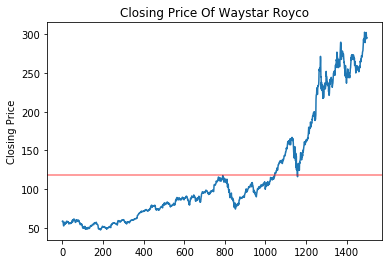

In [14]:
plt.plot(train['Close'])
plt.title("Closing Price Of Waystar Royco")
plt.ylabel('Closing Price')
plt.axhline(train['Close'].mean(),color='r',alpha=0.5)

**ACF and PACF**

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ACF

Open
High
Low
Volume
Close


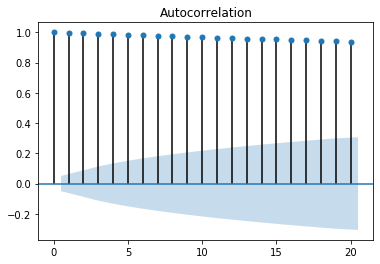

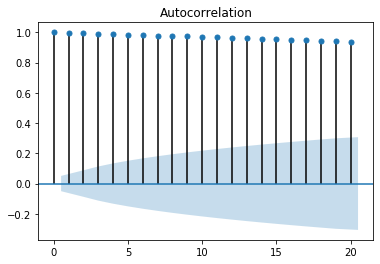

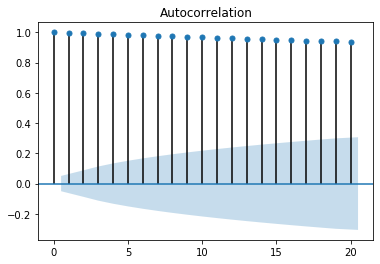

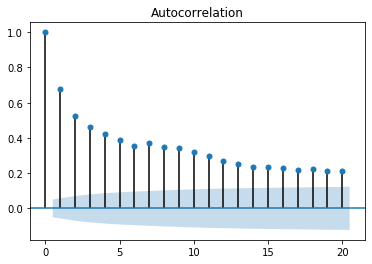

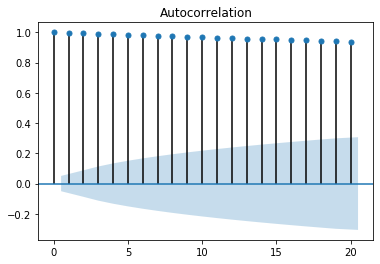

In [16]:
for i in train.columns[1:]:
    print(i)
    acf = plot_acf(train[i], lags = 20)

PACF

Open
High
Low
Volume
Close


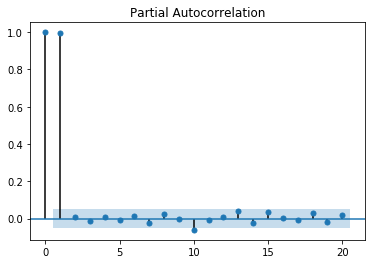

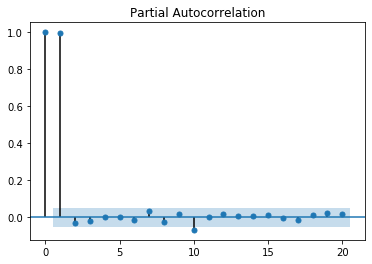

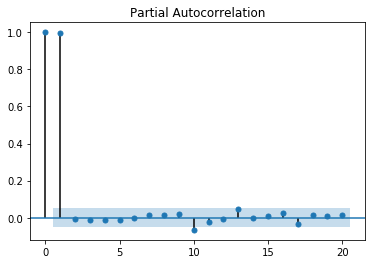

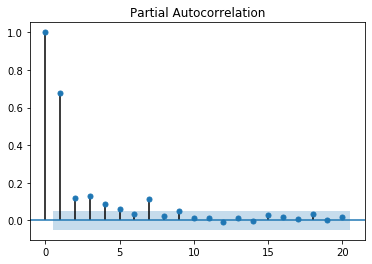

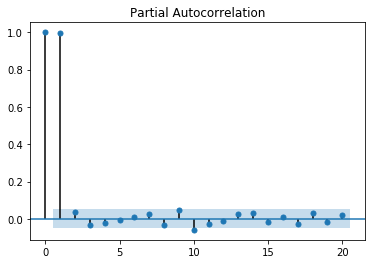

In [17]:
for i in train.columns[1:]:
    print(i)
    pacf = plot_pacf(train[i], lags = 20)

**Models**

Although there are only a few models below, we did experimnet with several other models as indicated in our submissions such as Lasso, MLR with column sums, MLR with log transform, RNNs, Vector Auto Regression, etc. We also experimented with several parameters for our models, as well as isolate certain columns to make predictions

We found that the volume column created a lot of noise in many models so we omitted it

Multiple Linear Regression Only

We have omitted volume in all except ARIMA as it mostly created noise

In [18]:
# Training and testing data
X_train= train.iloc[:,1:-2].values
y_train= train.iloc[:,-1].values
X_test= test.iloc[:,1:-2].values

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
# Fitting Data and making predictions
regressor = LinearRegression(normalize=True)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(y_pred)

[295.96557506 296.48214133 298.75885568 298.35691185 298.59370672
 297.74037338 297.07234726 298.14946675 297.28196727 301.39488875
 302.53137911 303.26541326 306.02027479 300.6690965  298.99648768
 300.49728026 303.92614759 305.60819635 302.38492795 301.58136798
 300.93570742 309.62442942 308.39961844 313.30256959 311.83709969
 312.80485747 317.67971563 314.55091034 314.59752657 306.51724539]


In [21]:
submission=pd.DataFrame({
    'Date':test.iloc[:,0].values,
    'Close':y_pred
})
submission.to_csv('./submissionMLR.csv',index=False)
# RMSE Obtained 1.76431

ARIMA

We chose to experiment with ARIMA due to the non stationary nature of the columns, and experimented with several orders

In [22]:
from statsmodels.tsa.arima_model import ARIMA

In [23]:
arima = ARIMA(train.Close,order = (1,1,1)) #Initializing model and orders

In [24]:
arima = arima.fit() #fitting data

In [25]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 1499
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3622.709
Method:                       css-mle   S.D. of innovations              2.712
Date:                Fri, 19 Nov 2021   AIC                           7253.418
Time:                        15:55:45   BIC                           7274.669
Sample:                             1   HQIC                          7261.335
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1584      0.064      2.459      0.014       0.032       0.285
ar.L1.D.Close    -0.3678      0.199     -1.846      0.065      -0.758       0.023
ma.L1.D.Close     0.2576      0.207      1.244      0.213      -0.148       0.663
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.7188           +0.0000j            2.7188            0.5000
MA.1           -3.8813           +0.0000j            3.8813            0.5000
-----------------------------------------------------------------------------
"""

In [26]:
test_data,se,conf = arima.forecast(len(test),alpha = 0.05)
test_data

array([295.80263864, 296.03458434, 296.16591584, 296.3342548 ,
       296.48898184, 296.64871556, 296.80660774, 296.96517727,
       297.12349766, 297.28190969, 297.44028801, 297.59867873,
       297.75706489, 297.91545273, 298.07383995, 298.23222739,
       298.39061475, 298.54900215, 298.70738953, 298.86577692,
       299.0241643 , 299.18255169, 299.34093907, 299.49932646,
       299.65771384, 299.81610123, 299.97448861, 300.132876  ,
       300.29126338, 300.44965077])

In [27]:
#ARIMA
submission=pd.DataFrame({
    'Date':test.iloc[:,0].values,
    'Close':test_data
})
submission.to_csv('./submissionARIMA.csv',index=False)
# RMSE Obtained 7.80518

**MLR + Smoothing**

To make things simple, we decided to experiment with exponential smoothing 


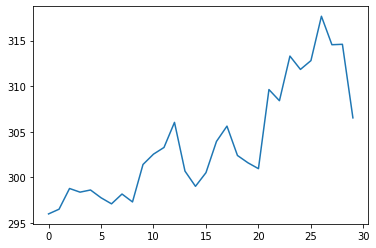

In [28]:
plt.plot(y_pred)

as we can see, y_pred has a trend but no seasonality
so we decided to use single and double exponential smoothing in the experiment

The next part of the code assumes that the values predicted via MLR are Y_actual. We use this to perform various forms of exponential smoothing

In [29]:
#Simple Exponential Smoothing
y_actual = y_pred[0]
f_predicted = y_actual
alpha = 0.9
simpleSmoothing = list()
for i in range(len(y_pred)):
    f_predicted = y_pred[i]*alpha + (1-alpha)*f_predicted
    simpleSmoothing.append(f_predicted)
    
np.array(simpleSmoothing)

array([295.96557506, 296.4304847 , 298.52601858, 298.37382252,
       298.5717183 , 297.82350787, 297.14746332, 298.04926641,
       297.35869718, 300.99126959, 302.37736816, 303.17660875,
       305.73590818, 301.17577767, 299.21441668, 300.3689939 ,
       303.57043223, 305.40441993, 302.68687715, 301.6919189 ,
       301.01132857, 308.76311933, 308.43596853, 312.81590948,
       311.93498067, 312.71786979, 317.18353104, 314.81417241,
       314.61919116, 307.32743996])

In [30]:
# Simple Exponential Smoothing Only
submission=pd.DataFrame({
    'Date':test.iloc[:,0].values,
    'Close':simpleSmoothing
})
submission.to_csv('./submissionSimpleSmoothing.csv',index=False)

In [31]:
#Double Exponential Smoothing
alpha = 0.9
beta = 0.7
Tt = 0.1
Ft = y_pred[0]
AFt = Ft + Tt
doubleSmoothing = list()
doubleSmoothing.append(AFt)
for i in range(1,len(y_pred)):
    prev_Ft = Ft
    prev_Tt = Tt
    Ft = alpha*y_pred[i] + (1 - alpha)*AFt
    Tt = beta*(Ft - prev_Ft) + (1 - beta)*prev_Tt
    AFt = Ft + Tt
    doubleSmoothing.append(AFt)
    
np.array(doubleSmoothing)

array([296.06557506, 296.80292145, 300.15793757, 298.99704353,
       298.83996732, 297.36351551, 296.43121082, 298.38988914,
       297.10701666, 303.38171816, 304.49631604, 304.49293781,
       307.93419765, 298.88524946, 296.54508677, 300.15166573,
       305.9762278 , 307.84066807, 301.68905426, 300.28284656,
       299.97243363, 313.84199948, 310.69792613, 316.4371002 ,
       312.79409438, 313.30755655, 320.50073532, 314.6557387 ,
       314.07652001, 301.98400206])

In [32]:
# Double Exponential Smoothing Only
submission=pd.DataFrame({
    'Date':test.iloc[:,0].values,
    'Close':doubleSmoothing
})
submission.to_csv('./submissionDoubleSmoothing.csv',index=False)

In [33]:
# Average of results of Simple Exponential Smoothing, Double Exponential Smoothing and MLR
submission=pd.DataFrame({
    'Date':test.iloc[:,0].values,
    'Close': (np.array(simpleSmoothing) + np.array(doubleSmoothing) + y_pred)/3
})
submission.to_csv('./submissionensemble1.csv',index=False)
# RMSE obtained 1.63106 -> Final DataSet

In [34]:
# Average of results of Double exponential smoothing and MLR
submission=pd.DataFrame({
    'Date':test.iloc[:,0].values,
    'Close': (np.array(doubleSmoothing) + y_pred)/2
})
submission.to_csv('./submissionensemble2.csv',index=False)
# RMSE obtained 1.64366